# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 10</font>
## <font color='blue'>Design e Construção de 50 Visualizações</font>
## <font color='blue'>Visualizações de 35 a 43</font>

![title](imagens/Projeto10.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>. Recomendamos ainda o capítulo sobre Machine Learning nesse mesmo curso.

### Definição do Problema e Fonte de Dados

Leia os manuais em pdf no Capítulo 11 do curso.

Neste mini-projeto o objetivo será analisar dados sobre o PIB, população e expectativa de vida de países em 5 continentes.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports
import math
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.4.3
seaborn   : 0.11.2
pandas    : 1.3.5
numpy     : 1.21.5



In [5]:
dados = pd.read_csv('dados/dataset6.tsv', sep = '\t')

In [6]:
dados.shape

(1704, 6)

In [7]:
dados.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [9]:
first_year = dados['year'].min()
first_year

1952

In [10]:
latest_year = dados['year'].max()
latest_year

2007

In [11]:
dados['gdpPercap'].describe()

count      1704.000000
mean       7215.327081
std        9857.454543
min         241.165876
25%        1202.060309
50%        3531.846988
75%        9325.462346
max      113523.132900
Name: gdpPercap, dtype: float64

> Dataviz 35 - Boxplot com a distribuição do PIB Per-Capita por continente

In [12]:
countries = dados[['country', 'continent']]
countries = countries.drop_duplicates()

In [13]:
countries.shape   

(142, 2)

In [14]:
country_counts = countries.groupby('continent', as_index = False)['country'].count()
country_counts

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [15]:
country_counts.columns = ['continent', 'n_countries']
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [16]:
continents = country_counts['continent']
continents

0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object

In [17]:
continent_gdp_latest = []
for c in continents:
    gm_latest_cur_cont = dados[dados['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)

In [18]:
continent_gdp_latest

[array([ 2449.008185 ,  3013.976023 ,  2550.81688  ,  3246.991771 ,
         4182.663766 ,  4910.416756 ,  5745.160213 ,  5681.358539 ,
         5023.216647 ,  4797.295051 ,  5288.040382 ,  6223.367465 ,
         3520.610273 ,  3827.940465 ,  4269.276742 ,  5522.776375 ,
         5473.288005 ,  3008.647355 ,  2756.953672 ,  2430.208311 ,
         2627.845685 ,  2277.140884 ,  2773.287312 ,  4797.231267 ,
         1062.7522   ,   959.6010805,   949.4990641,  1035.831411 ,
         1085.796879 ,  1029.161251 ,  1277.897616 ,  1225.85601  ,
         1191.207681 ,  1232.975292 ,  1372.877931 ,  1441.284873 ,
          851.2411407,   918.2325349,   983.6539764,  1214.709294 ,
         2263.611114 ,  3214.857818 ,  4551.14215  ,  6205.88385  ,
         7954.111645 ,  8647.142313 , 11003.60508  , 12569.85177  ,
          543.2552413,   617.1834648,   722.5120206,   794.8265597,
          854.7359763,   743.3870368,   807.1985855,   912.0631417,
          931.7527731,   946.2949618,  1037.6452

([<matplotlib.axis.XTick at 0x7fd3be6528e0>,
 [Text(1, 0, 'Africa'),
  Text(2, 0, 'Americas'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'Europe'),
  Text(5, 0, 'Oceania')])

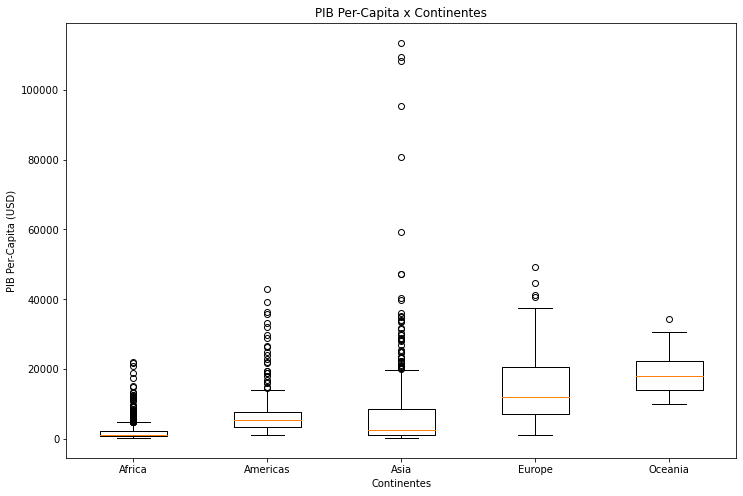

In [19]:
# Dataviz 35
plt.figure(figsize = (12,8))
plt.boxplot(continent_gdp_latest)
plt.title('PIB Per-Capita x Continentes')
plt.xlabel('Continentes')
plt.ylabel('PIB Per-Capita (USD)')
plt.xticks(range(1, len(continents)+1), continents)

> Dataviz 36 - Gráfico de linha com o PIB Per-Capita ao longo do tempo em Portugal e Espanha

In [20]:
portugal = dados[dados['country'] == 'Portugal']
portugal.head()

,country,continent,year,lifeExp,pop,gdpPercap
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417


In [21]:
spain = dados[dados['country'] == 'Spain']
spain.head()

,country,continent,year,lifeExp,pop,gdpPercap
1416,Spain,Europe,1952,64.94,28549870.0,3834.034742
1417,Spain,Europe,1957,66.66,29841614.0,4564.802410
1418,Spain,Europe,1962,69.69,31158061.0,5693.843879
1419,Spain,Europe,1967,71.44,32850275.0,7993.512294
1420,Spain,Europe,1972,73.06,34513161.0,10638.751310


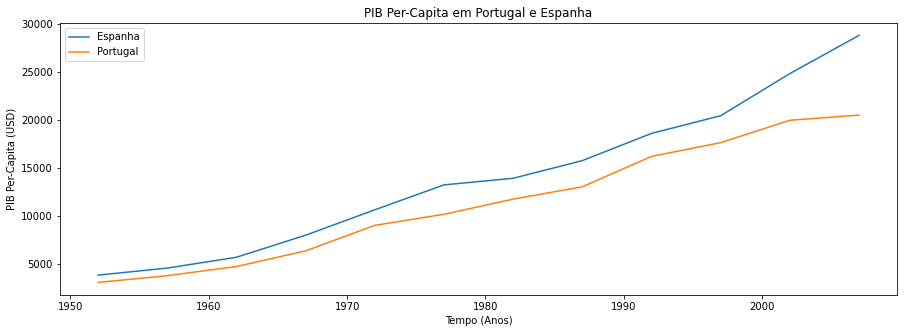

In [22]:
# Dataviz 36
plt.figure(figsize = (15,5))
plt.plot(spain['year'], spain['gdpPercap'], label = 'Espanha')
plt.plot(portugal['year'], portugal['gdpPercap'], label = 'Portugal')
plt.title('PIB Per-Capita em Portugal e Espanha')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-Capita (USD)')
plt.legend()

> Dataviz 37 - Gráfico de linha com o PIB Per-Capita ao longo do tempo em Portugal e Espanha, em plots diferentes

(2500.0, 30000.0)

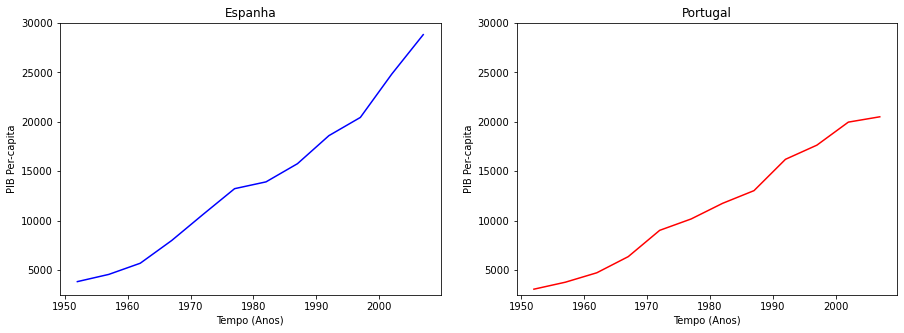

In [23]:
# Dataviz 37
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], color = 'blue')
plt.title('Espanha')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-capita')
plt.ylim(2500, 30000)

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], color = 'red')
plt.title('Portugal')
plt.xlabel('Tempo (Anos)')
plt.ylabel('PIB Per-capita')
plt.ylim(2500, 30000)

> Dataviz 38 - Scatter Plot mostrando a relação entre PIB Per-Capita e expectativa de vida

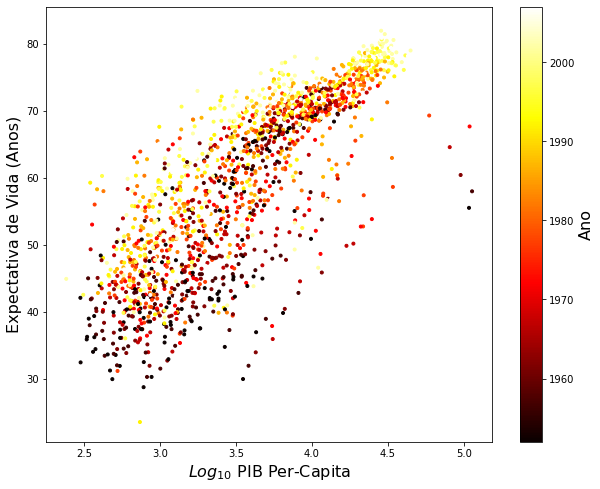

In [24]:
# Dataviz 38
plt.figure(figsize = (10, 8))
plt.scatter(np.log10(dados['gdpPercap']), dados['lifeExp'], marker = '.', c = dados['year'], cmap = 'hot')
plt.xlabel('$Log_{10}$ PIB Per-Capita', fontsize = 16)
plt.ylabel('Expectativa de Vida (Anos)', fontsize = 16)
plt.colorbar().set_label('Ano', fontsize = 16)

> Dataviz 39 - Scatter Plot mostrando a relação entre PIB Per-Capita e expectativa de vida por continente

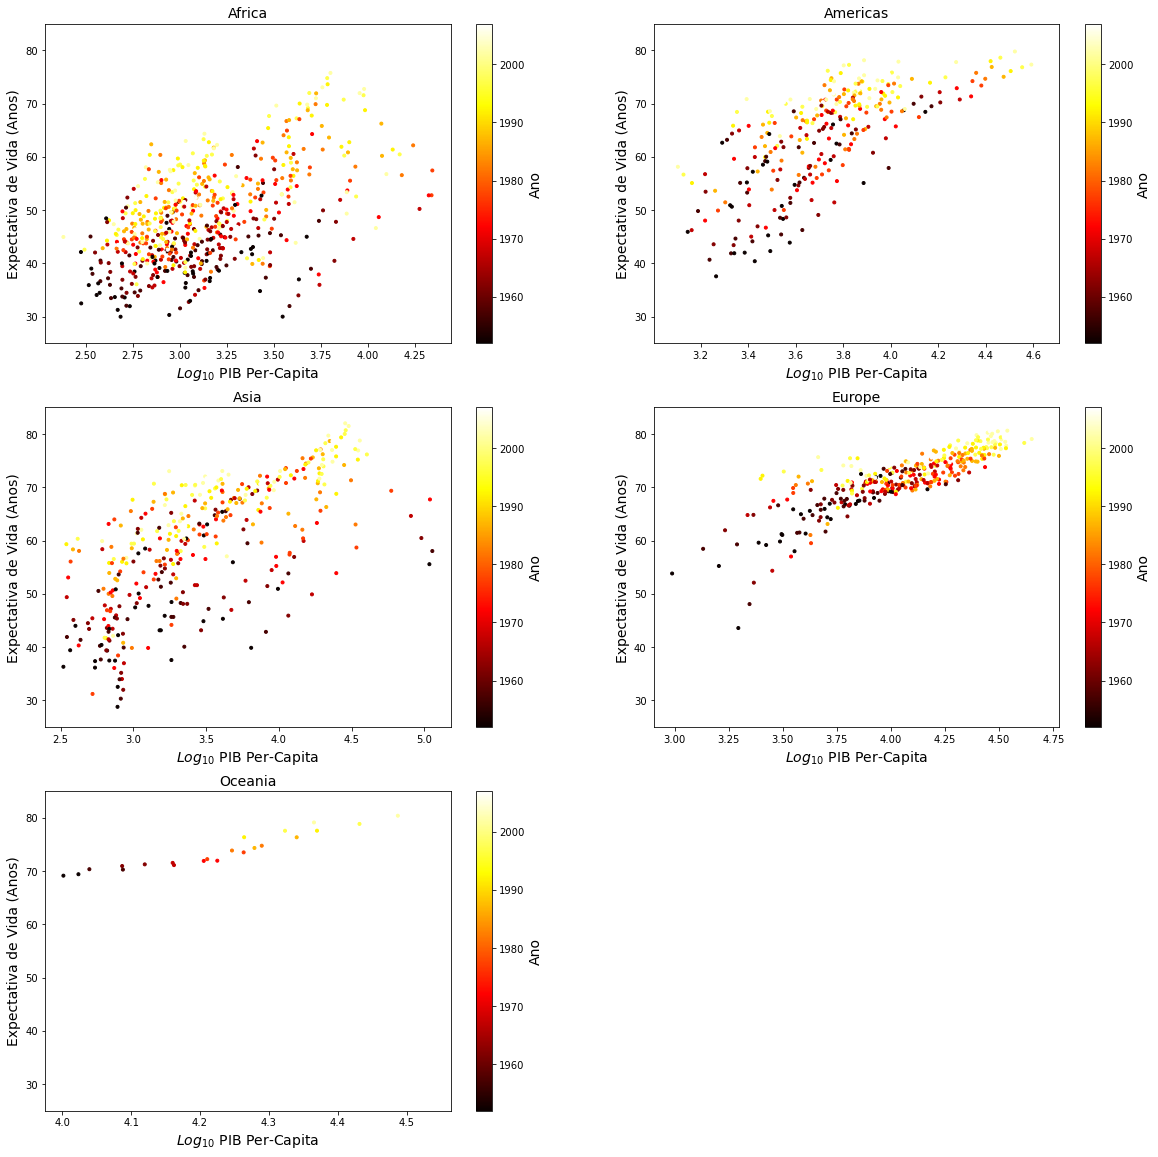

In [25]:
# Dataviz 39
plt.figure(figsize = (20,20))

for i, continent in enumerate(continents):

    cur_continent_df = dados[dados['continent'] == continent]

    plt.subplot(3,2,i+1)
    
    plt.scatter(np.log10(cur_continent_df['gdpPercap']), 
                cur_continent_df['lifeExp'], 
                marker = '.', 
                c = cur_continent_df['year'], 
                cmap = 'hot')
    
    plt.xlabel('$Log_{10}$ PIB Per-Capita', fontsize = 14)
    plt.ylabel('Expectativa de Vida (Anos)', fontsize = 14)
    plt.title(continent, fontsize = 14)
    plt.ylim(25,85)
    plt.colorbar().set_label('Ano', fontsize = 14)

> Dataviz 40 - Scatter Plot mostrando a relação entre PIB Per-Capita e população

Text(0.5, 1.0, 'PIB Per-Capita x População ao Longo do Tempo')

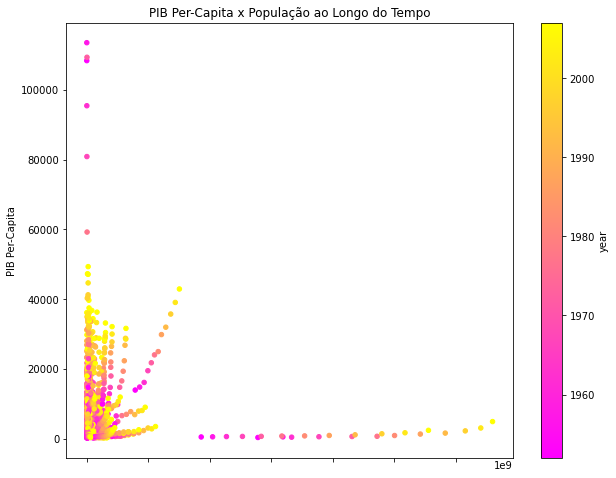

In [26]:
# Dataviz 40
dados.plot(x = 'pop', y = 'gdpPercap', c = 'year', cmap = 'spring', kind = 'scatter', figsize = (10,8))
plt.xlabel('População')
plt.ylabel('PIB Per-Capita')
plt.title('PIB Per-Capita x População ao Longo do Tempo')

> Dataviz 41 - Gráfico de linha com a evolução média do PIB por continente, ao longo do tempo (com divisão em décadas)

In [27]:
hexsix = np.array(['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837'])
dados['decade'] = (dados['year'] / 10).astype(int) * 10
decades = dados['decade'].unique()
decades

array([1950, 1960, 1970, 1980, 1990, 2000])

In [28]:
per_continent_mean_gdp = dados.groupby(['continent', 'year'], as_index = False)['gdpPercap'].mean()

In [29]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

In [30]:
for (k, v) in params.items(): 
    plt.rcParams[k] = v

In [31]:
plt.style.use('fivethirtyeight')

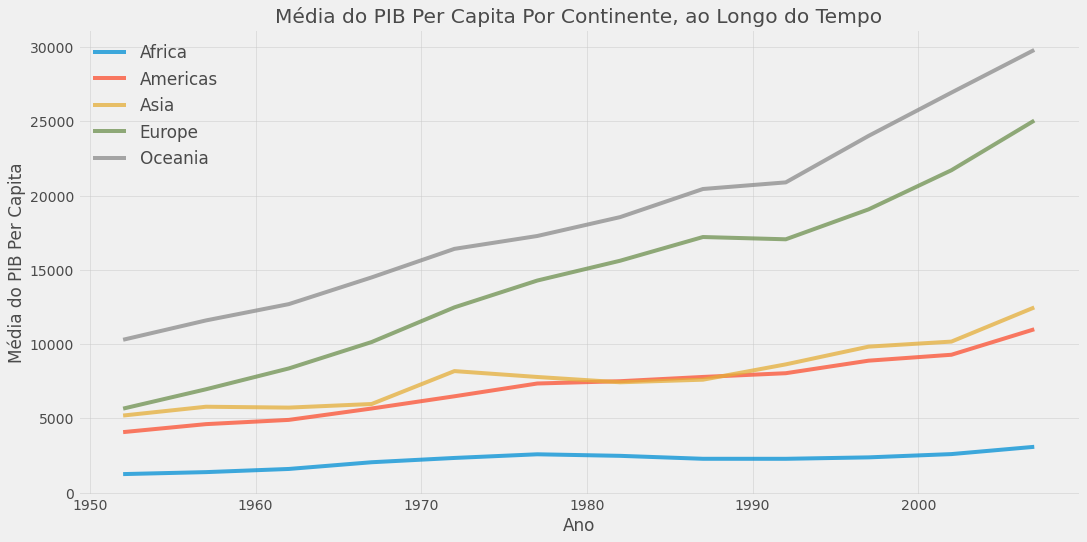

In [32]:
# Dataviz 41
plt.figure(figsize = (16, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha = 0.75, 
             label = continent)

plt.title('Média do PIB Per Capita Por Continente, ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Média do PIB Per Capita')
plt.legend(loc = 'upper left')

> Dataviz 42 - Boxplot e Stripplot com a distribuição da expectativa de vida por continente

Text(0, 0.5, 'Expectativa de Vida')

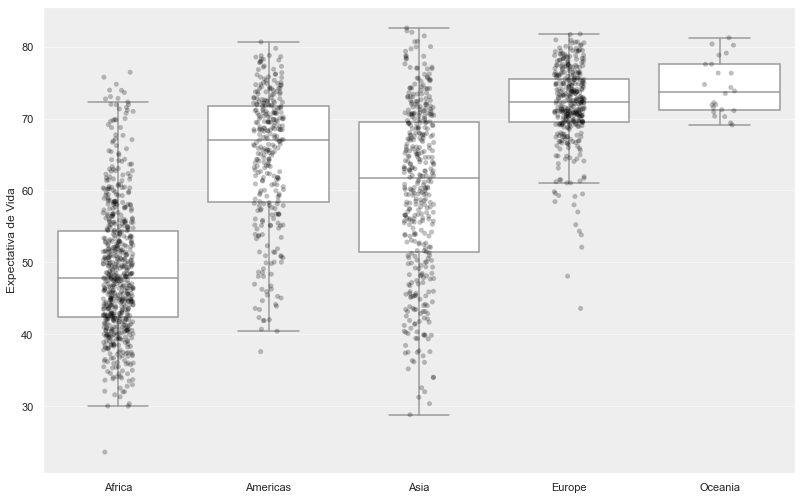

In [33]:
# Dataviz 42
sns.set(rc = {'axes.facecolor' : '#EEEEEE'})
plt.figure(figsize = (12, 8))

sns.boxplot(x = "continent", 
            y = "lifeExp", 
            data = dados,
            order = np.sort(dados.continent.unique()),
            color = 'white', 
            fliersize = 0)

sns.stripplot(x = "continent", 
              y = "lifeExp", 
              data = dados,
              order = np.sort(dados.continent.unique()),
              alpha = 0.25, 
              size = 5, 
              jitter = True,
              color = 'Black', 
              edgecolor = 'Black')

plt.xlabel('')
plt.ylabel('Expectativa de Vida')

> Dataviz 43 - Jointplot com Scatter Plot e Histograma do PIB e da expectativa de vida

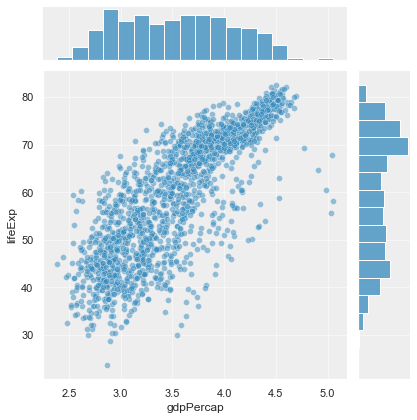

In [34]:
# Dataviz 43
sns.jointplot(np.log10(dados['gdpPercap']), dados['lifeExp'], color = "#348ABD", alpha = 0.5)

# Fim